# Scraping Notebook:
### NFL Salary Cap Optimization by Position Group

---

### 1) Imports
---

In [1]:
import pandas as pd
import numpy as np

#For Scraping
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait 
import time
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import csv

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

---

### 2)Scraping Data


For the following scrapes I isolated the dataframe by year and team to ensure I am using the proper team abreviations.  
Team abreviations can change from year to year due to relocation or adapting new names.

I then analyzed the naming conventions for the individual team websites and wrote an excel function that concatted to the
below Python strings, which I pasted below.

In [2]:
# The following scrapes return a list that contain several dataframes with detailed contract information for each year
# Scraping Data by year (2021)

arz_2021 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2021")
atl_2021 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2021")
blt_2021 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2021")
buf_2021 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2021")
car_2021 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2021")
chi_2021 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2021")
cin_2021 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2021")
cle_2021 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2021")
dal_2021 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2021")
den_2021 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2021")
det_2021 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2021")
gb_2021 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2021")
hou_2021 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2021")
ind_2021 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2021")
jax_2021 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2021")
kc_2021 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2021")
lac_2021 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2021")
lar_2021 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2021")
lv_2021 =pd.read_html("https://www.spotrac.com/nfl/Las-Vegas-Raiders/cap/2021")
mia_2021 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2021")
min_2021 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2021")
ne_2021 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2021")
no_2021 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2021")
nyg_2021 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2021")
nyj_2021 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2021")
phi_2021 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2021")
pit_2021 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2021")
sea_2021 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2021")
sf_2021 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2021")
tb_2021 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2021")
ten_2021 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2021")
was_2021 =pd.read_html("https://www.spotrac.com/nfl/Washington-Football-Team/cap/2021")

In [3]:
# Scraping Data by year (2020)

arz_2020 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2020")
atl_2020 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2020")
blt_2020 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2020")
buf_2020 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2020")
car_2020 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2020")
chi_2020 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2020")
cin_2020 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2020")
cle_2020 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2020")
dal_2020 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2020")
den_2020 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2020")
det_2020 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2020")
gb_2020 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2020")
hou_2020 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2020")
ind_2020 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2020")
jax_2020 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2020")
kc_2020 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2020")
lac_2020 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2020")
lar_2020 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2020")
lv_2020 =pd.read_html("https://www.spotrac.com/nfl/Las-Vegas-Raiders/cap/2020")
mia_2020 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2020")
min_2020 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2020")
ne_2020 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2020")
no_2020 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2020")
nyg_2020 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2020")
nyj_2020 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2020")
phi_2020 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2020")
pit_2020 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2020")
sf_2020 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2020")
sea_2020 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2020")
tb_2020 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2020")
ten_2020 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2020")
was_2020 =pd.read_html("https://www.spotrac.com/nfl/Washington-Football-Team/cap/2020")

In [4]:
# 2019

arz_2019 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2019")
atl_2019 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2019")
blt_2019 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2019")
buf_2019 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2019")
car_2019 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2019")
chi_2019 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2019")
cin_2019 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2019")
cle_2019 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2019")
dal_2019 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2019")
den_2019 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2019")
det_2019 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2019")
gb_2019 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2019")
hou_2019 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2019")
ind_2019 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2019")
jax_2019 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2019")
kc_2019 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2019")
lac_2019 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2019")
lar_2019 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2019")
lv_2019 =pd.read_html("https://www.spotrac.com/nfl/Oakland-Raiders/cap/2019")
mia_2019 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2019")
min_2019 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2019")
ne_2019 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2019")
no_2019 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2019")
nyg_2019 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2019")
nyj_2019 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2019")
phi_2019 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2019")
pit_2019 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2019")
sf_2019 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2019")
sea_2019 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2019")
tb_2019 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2019")
ten_2019 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2019")
was_2019 =pd.read_html("https://www.spotrac.com/nfl/washington-redskins/cap/2019")

# 3) Cleaning

In [5]:
# These dataframes have great data, but the are missing labeling for team and year so we will add them
# Creating Lists of lists of dataframes by year so we can accurately

team_2019_list = [arz_2019,
atl_2019,
blt_2019,
buf_2019,
car_2019,
chi_2019,
cin_2019,
cle_2019,
dal_2019,
den_2019,
det_2019,
gb_2019,
hou_2019,
ind_2019,
jax_2019,
kc_2019,
lac_2019,
lar_2019,
lv_2019,
mia_2019,
min_2019,
ne_2019,
no_2019,
nyg_2019,
nyj_2019,
phi_2019,
pit_2019,
sea_2019,
sf_2019,
tb_2019,
ten_2019,
was_2019]

team_2020_list = [arz_2020,
atl_2020,
blt_2020,
buf_2020,
car_2020,
chi_2020,
cin_2020,
cle_2020,
dal_2020,
den_2020,
det_2020,
gb_2020,
hou_2020,
ind_2020,
jax_2020,
kc_2020,
lac_2020,
lar_2020,
lv_2020,
mia_2020,
min_2020,
ne_2020,
no_2020,
nyg_2020,
nyj_2020,
phi_2020,
pit_2020,
sea_2020,
sf_2020,
tb_2020,
ten_2020,
was_2020]

team_2021_list =[arz_2021,
atl_2021,
blt_2021,
buf_2021,
car_2021,
chi_2021,
cin_2021,
cle_2021,
dal_2021,
den_2021,
det_2021,
gb_2021,
hou_2021,
ind_2021,
jax_2021,
kc_2021,
lac_2021,
lar_2021,
lv_2021,
mia_2021,
min_2021,
ne_2021,
no_2021,
nyg_2021,
nyj_2021,
phi_2021,
pit_2021,
sea_2021,
sf_2021,
tb_2021,
ten_2021,
was_2021]

In [6]:
# The following list follows the naming convention and order used in the above year lists.
# This will ensure we are correctly labeling the dataframes as we interate over the year lists.

sorted_team_list = ["arz",
"atl",
"blt",
"buf",
"car",
"chi",
"cin",
"cle",
"dal",
"den",
"det",
"gb",
"hou",
"ind",
"jax",
"kc",
"lac",
"lar",
"lv",
"mia",
"min",
"ne",
"no",
"nyg",
"nyj",
"phi",
"pit",
"sea",
"sf",
"tb",
"ten",
"was"
]

# verify all 32 teams
len(sorted_team_list) == 32

True

In [7]:
# create value for looping
value = -1

In [8]:
for team in team_2019_list:
    value += 1
    for i in team:
        i['year'] = '2019'
        i['team'] = sorted_team_list[value]

In [9]:
value = -1

for team in team_2020_list:
    value += 1
    for i in team:
        i['year'] = '2020'
        i['team'] = sorted_team_list[value]

In [10]:
value = -1

for team in team_2021_list:
    value += 1
    for i in team:
        i['year'] = '2021'
        i['team'] = sorted_team_list[value]

In [11]:
# Now that the Dataframes are appropraitely labeled, we can combine them to start our master database.
# Rewrite?

team_master_list = [arz_2019,
atl_2019,
blt_2019,
buf_2019,
car_2019,
chi_2019,
cin_2019,
cle_2019,
dal_2019,
den_2019,
det_2019,
gb_2019,
hou_2019,
ind_2019,
jax_2019,
kc_2019,
lac_2019,
lar_2019,
lv_2019,
mia_2019,
min_2019,
ne_2019,
no_2019,
nyg_2019,
nyj_2019,
phi_2019,
pit_2019,
sea_2019,
sf_2019,
tb_2019,
ten_2019,
was_2019,
arz_2020,
atl_2020,
blt_2020,
buf_2020,
car_2020,
chi_2020,
cin_2020,
cle_2020,
dal_2020,
den_2020,
det_2020,
gb_2020,
hou_2020,
ind_2020,
jax_2020,
kc_2020,
lac_2020,
lar_2020,
lv_2020,
mia_2020,
min_2020,
ne_2020,
no_2020,
nyg_2020,
nyj_2020,
phi_2020,
pit_2020,
sea_2020,
sf_2020,
tb_2020,
ten_2020,
was_2020,
arz_2021,
atl_2021,
blt_2021,
buf_2021,
car_2021,
chi_2021,
cin_2021,
cle_2021,
dal_2021,
den_2021,
det_2021,
gb_2021,
hou_2021,
ind_2021,
jax_2021,
kc_2021,
lac_2021,
lar_2021,
lv_2021,
mia_2021,
min_2021,
ne_2021,
no_2021,
nyg_2021,
nyj_2021,
phi_2021,
pit_2021,
sea_2021,
sf_2021,
tb_2021,
ten_2021,
was_2021
]

In [12]:
# Luckily we notice that the dataframes we want mostly have the same column headers except for the first column
# which uses an indivualalized title based on # of entries in list.
# The other instance is in the final datafame of each list of dataframes. The last dataframe for each list contains totals
# from all other dataframes which could be useful, but is more easily gathered from groupbys performed after cleaning.

# The nested loop below goes into each list of dataframes and removes the player names and instead replaces them with
# the final value in the first dataframe column which states what player's status is and renamed the column "Status" 

# This is done for a couple reasons...
# First, it protects player identity and any possible bias associated with names.
# Secondly, the column now displays useful information we can use for our modeling, where player names were useless
# Lastly, it cleans up the column header for easy merging.

for team in team_master_list:
    for i in team:
        i.iloc[:,0] = i.iloc[-1,0]
        i.rename(columns={i.columns[0]: "Status" }, inplace = True)

In [13]:
# Creating a list with common col names
col_list = team_master_list[0][0].columns

In [14]:
# Starting Master df to build upon with col_list as col titles
master_df = pd.DataFrame(columns=col_list)

In [15]:
# Combining all dataframes from team_master_list into 1 dataframe
for i in team_master_list:
    for data in i:
        master_df = pd.concat([master_df, data])

In [16]:
# Filtering to rows I want 
filtered_df = master_df[['Status', 'Pos.', 'Cap Hit', 'Cap %', 'year', 'team']]

In [17]:
# now that i've filtered to only values I want, I can safely drop NaN values
# end result should be 12578 as I only want rows that were orignalky tied to players (whom played a "Pos.")
filtered_df.dropna(inplace=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 58
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Status   12578 non-null  object
 1   Pos.     12578 non-null  object
 2   Cap Hit  12578 non-null  object
 3   Cap %    12578 non-null  object
 4   year     12578 non-null  object
 5   team     12578 non-null  object
dtypes: object(6)
memory usage: 687.9+ KB


<ipython-input-17-d4b6a2594e69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


In [18]:
# Preping data to be cast as int
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(' ', '')
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('$', '')
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(',', '')

<ipython-input-18-b80b56dacf78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(' ', '')
<ipython-input-18-b80b56dacf78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('$', '')
<ipython-input-18-b80b56dacf78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [19]:
# Creating unique ID that displays "abreviation_year" for the team for future analysis
filtered_df['ID'] = filtered_df['team'].astype(str) + '_' + filtered_df['year'].astype(str)

<ipython-input-19-f9caef986009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ID'] = filtered_df['team'].astype(str) + '_' + filtered_df['year'].astype(str)


In [20]:
#Some 0's represented as '-'
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('-', '0')

<ipython-input-20-6fefd1587ff2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('-', '0')


In [21]:
#Changing datatypes

filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)
filtered_df['Cap %'] = filtered_df['Cap %'].astype(float)

<ipython-input-21-9b504fa6227f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)
<ipython-input-21-9b504fa6227f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap %'] = filtered_df['Cap %'].astype(float)


In [22]:
# Read in win% dataframe
win_percent_by_year = pd.read_csv('data/win_percent_by_year.csv')

In [23]:
# Looks like every team is there for 11 seasons which is true, bue a few teams have switched cities resulting in multiple names
# I will convert them to their modern abreviations tp avoid confusion

win_percent_by_year['team'] = win_percent_by_year['team'].replace({'Minnesota Vikings': 'min',
                                                                       'Pittsburgh Steelers': 'pit',
                                                                       'Cleveland Browns': 'cle',
                                                                      'Seattle Seahawks': 'sea',
                                                                      'Baltimore Ravens': 'blt',
                                                                      'New York Jets': 'nyj',
                                                                      'Atlanta Falcons': 'atl',
                                                                      'Carolina Panthers': 'car',
                                                                      'Kansas City Chiefs': 'kc',
                                                                      'Buffalo Bills': 'buf',
                                                                      'Denver Broncos': 'den',
                                                                      'Indianapolis Colts': 'ind',
                                                                      'Tennessee Titans': 'ten',
                                                                      'Tampa Bay Buccaneers': 'tb',
                                                                      'Dallas Cowboys': 'dal',
                                                                      'Miami Dolphins': 'mia',
                                                                      'New York Giants': 'nyg',
                                                                      'New England Patriots': 'ne',
                                                                      'Green Bay Packers': 'gb',
                                                                      'Jacksonville Jaguars': 'jax',
                                                                      'Chicago Bears': 'chi',
                                                                      'Houston Texans': 'hou',
                                                                      'Detroit Lions': 'det',
                                                                      'New Orleans Saints': 'no',
                                                                      'San Francisco 49ers': 'sf',
                                                                      'Philadelphia Eagles': 'phi',
                                                                      'Arizona Cardinals': 'arz',
                                                                      'Cincinnati Bengals': 'cin',
                                                                      'Washington Redskins': 'was',
                                                                      'Washington Football Team': 'was',
                                                                      'Oakland Raiders': 'lv',
                                                                      'Las Vegas Raiders': 'lv',
                                                                      'Los Angeles Rams': 'lar',
                                                                      'St. Louis Rams': 'lar',
                                                                      'San Diego Chargers': 'lac',
                                                                      'Los Angeles Chargers': 'lac'})

In [24]:
# Filtering to yearly data to create appropriate ['ID'] column for merging
winpercentage_21 = win_percent_by_year[(win_percent_by_year['year'] == 2021)]

In [25]:
winpercentage_20 = win_percent_by_year[(win_percent_by_year['year'] == 2020)]

In [26]:
winpercentage_19 = win_percent_by_year[(win_percent_by_year['year'] == 2019)]

In [27]:
# verify
winpercentage_21

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0
5,6,pit,0.559,54,25.80,"$125,664,123","$30,380,017","$177,407,130","$10,042,925",2021.0
6,7,cle,0.471,56,25.59,"$126,473,899","$29,003,079","$202,441,273","$9,468,418",2021.0
7,8,hou,0.235,56,26.80,"$115,736,939","$48,012,147","$186,825,534","$7,643,225",2021.0
8,9,was,0.412,56,25.68,"$108,019,140","$22,258,385","$193,566,718","$6,172,203",2021.0
9,10,ten,0.706,56,27.00,"$141,092,116","$30,830,452","$184,416,734","$6,128,963",2021.0


In [28]:
# Create 'ID' column for easy merges
winpercentage_21['ID'] = winpercentage_21['team'].astype(str) + '_' + winpercentage_21['year'].astype(int).astype(str)
winpercentage_20['ID'] = winpercentage_20['team'].astype(str) + '_' + winpercentage_20['year'].astype(int).astype(str)
winpercentage_19['ID'] = winpercentage_19['team'].astype(str) + '_' + winpercentage_19['year'].astype(int).astype(str)

<ipython-input-28-d6911f40ced0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winpercentage_21['ID'] = winpercentage_21['team'].astype(str) + '_' + winpercentage_21['year'].astype(int).astype(str)
<ipython-input-28-d6911f40ced0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winpercentage_20['ID'] = winpercentage_20['team'].astype(str) + '_' + winpercentage_20['year'].astype(int).astype(str)
<ipython-input-28-d6911f40ced0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [29]:
# creating list for merging
win_percent_list =[winpercentage_21, winpercentage_20, winpercentage_19]

# df for merging
win_percent_df = pd.DataFrame(columns=winpercentage_21.columns)

In [30]:
# Merging loop
for i in win_percent_list:
    win_percent_df = pd.concat([win_percent_df, i])

In [31]:
# Merge team based win% data to apropriate lines based on ['ID'] values we created.
merged_df = pd.merge(win_percent_df, filtered_df, on = 'ID', how= 'outer')

In [32]:
# Filter to desired cols
FINAL_df = merged_df[['Status', 'Pos.', 'Cap Hit', 'Cap %', 'ID', 'win%', 'signed', 'avg_age',"team_x",'year_y']]

In [33]:
# Bin Pos. values in smaller position groups.
FINAL_df['Pos.'].value_counts()

WR     1654
CB     1437
DE      957
DT      933
RB      898
TE      831
G       761
OLB     645
QB      541
S       528
ILB     470
T       452
LB      437
C       394
K       264
FS      244
RT      242
LT      208
SS      205
P       191
LS      158
FB      124
OL        4
Name: Pos., dtype: int64

In [34]:
# I will break down these 23 position groups in the following 8 categories for analysis

position_dict = {'WR': 'receiver',
                'CB': 'd-back',
                'DT': 'd-line',
                'DE': 'd-line',
                'RB': 'runner',
                'TE': 'receiver',
                'G': 'o-line',
                'S': 'd-back',
                'QB': 'passer',
                'OLB': 'linebacker',
                'LB': 'linebacker',
                'T': 'o-line',
                'ILB': 'linebacker',
                'C': 'o-line',
                'K': 'kicking',
                'RT': 'o-line',
                'LT': 'o-line',
                'P': 'kicking',
                'FS': 'd-back',
                'SS': 'd-back',
                'LS': 'kicking',
                'FB': 'runner',
                'OL': 'o-line'}

In [35]:
# Apply to dataframe
FINAL_df['POS_GRP'] = [position_dict[pos] for pos in FINAL_df['Pos.']]
FINAL_df['POS_GRP'].value_counts()

<ipython-input-35-dc7c54b18be7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FINAL_df['POS_GRP'] = [position_dict[pos] for pos in FINAL_df['Pos.']]


receiver      2485
d-back        2414
o-line        2061
d-line        1890
linebacker    1552
runner        1022
kicking        613
passer         541
Name: POS_GRP, dtype: int64

In [36]:
# Looking at win% distibution across the data set to get mathematically calculated groupings.
FINAL_df.describe()

,Cap Hit,Cap %,win%,avg_age
count,1.257800e+04,12578.000000,12578.000000,12578.000000
mean,1.465177e+06,0.727772,0.493051,26.183677
std,3.040663e+06,1.510517,0.192210,0.578946
min,0.000000e+00,0.000000,0.063000,24.980000
25%,6.705800e+04,0.030000,0.353000,25.770000
50%,4.166670e+05,0.210000,0.500000,26.100000
75%,1.093754e+06,0.560000,0.647000,26.660000
max,3.382061e+07,17.400000,0.875000,27.580000


In [37]:
# Binning win% based on metrics above.
# low_win% = 0.00 - 0.353
# avg_win% = .354 - .647
# high_win% = .648 - 1.00

# Create list to be merged with dataframe
win_bin_list = []

#convert both title columns to lists for conversion later.
win_list = FINAL_df['win%'].tolist()

# Create duplicate title list.
for percent in win_list:
     if percent <= .353:
        win_bin_list.append('low_win%')
     elif percent <= .647:
        win_bin_list.append('avg_win%')
     elif percent <= 1:
        win_bin_list.append('high_win%')
     else:
         continue

# make sure list is 12578
len(win_bin_list)


12578

In [38]:
# Create new col with correlated data
FINAL_df['WIN%_GRP'] = win_bin_list

<ipython-input-38-2bdb95ca4123>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FINAL_df['WIN%_GRP'] = win_bin_list


<function matplotlib.pyplot.show(close=None, block=None)>

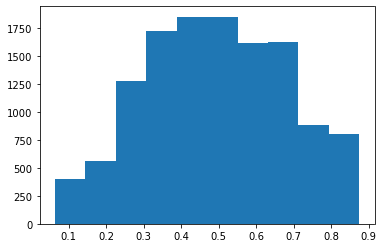

In [39]:
# PLot distribution (should be somewhat normal)
fig,ax = plt.subplots()
ax.hist(FINAL_df['win%'])
plt.show

In [40]:
# filtering out 'Cap Hit' and 'Pos.' as they are redudent with Pos_Grp and Cap% which serve as better metrics
FINAL_df = FINAL_df.drop(['Cap Hit', 'Pos.'], axis=1)

In [41]:
# Grouping for total Cap% spent by each team, each year. Not always 100.
ID_df = FINAL_df.groupby(['ID']).sum()
ID_df

,Cap %,win%,avg_age
ID,,,
arz_2019,99.19,45.752,3435.39
arz_2020,98.74,70.000,3738.00
arz_2021,99.43,97.050,4093.50
atl_2019,97.10,53.436,3248.86
atl_2020,98.66,30.000,3208.80
...,...,...,...
ten_2020,98.26,95.632,3727.98
ten_2021,96.69,116.490,4455.00
was_2019,93.34,24.252,3356.58


In [42]:
# Merge
new_merged_df = pd.merge(FINAL_df, ID_df, on = 'ID', how= 'outer')
new_merged_df

,Status,Cap %_x,ID,win%_x,signed,avg_age_x,team_x,year_y,POS_GRP,WIN%_GRP,Cap %_y,win%_y,avg_age_y
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,86.39,26.752,3872.96
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,86.39,26.752,3872.96
2,Active Roster:,5.81,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%,86.39,26.752,3872.96
3,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,86.39,26.752,3872.96
4,Active Roster:,3.20,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%,86.39,26.752,3872.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%,101.22,101.500,3112.28
12574,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,101.22,101.500,3112.28
12575,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%,101.22,101.500,3112.28
12576,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,101.22,101.500,3112.28


In [43]:
# Creating new ID to grp by team/year/Pos_GRP
FINAL_df['ID2'] = FINAL_df['ID'].astype(str) + '_' + FINAL_df['POS_GRP'].astype(str)

In [44]:
# Verify
FINAL_df

,Status,Cap %,ID,win%,signed,avg_age,team_x,year_y,POS_GRP,WIN%_GRP,ID2
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
2,Active Roster:,5.81,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%,jax_2021_linebacker
3,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
4,Active Roster:,3.20,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%,jax_2021_passer
...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%,blt_2019_receiver
12574,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker
12575,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%,blt_2019_kicking
12576,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker


In [45]:
team_year_grp_df = FINAL_df.groupby(['ID2']).sum()

In [46]:
# Could be useful for extra analysis. ROI? Average age for position grp?
team_year_grp_df

,Cap %,win%,avg_age
ID2,,,
arz_2019_d-back,15.84,8.600,645.75
arz_2019_d-line,8.05,6.536,490.77
arz_2019_kicking,1.93,1.376,103.32
arz_2019_linebacker,18.24,7.224,542.43
arz_2019_o-line,20.56,7.912,594.09
...,...,...,...
was_2021_linebacker,5.70,7.416,462.24
was_2021_o-line,23.25,11.536,719.04
was_2021_passer,12.94,3.708,231.12


In [47]:
# Bring in new totals
FINAL_df = pd.merge(FINAL_df, team_year_grp_df, on = 'ID2', how= 'outer')

In [48]:
# Verify
FINAL_df

,Status,Cap %_x,ID,win%_x,signed,avg_age_x,team_x,year_y,POS_GRP,WIN%_GRP,ID2,Cap %_y,win%_y,avg_age_y
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,5.98,17.500,536.60
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32


In [49]:
# Rename Columns for clarity
FINAL_df = FINAL_df.rename(columns={"Cap %_x": "cap_player", "win%_x": "win_player",
                                "avg_age_x": "avg_age_player", "Cap %_y": "total_team_cap",
                                "win%_y": "win%_ID2", "Cap %_y": "Cap%_ID2",
                                })

In [50]:
# ID Based on year and POS_GRP for analysis
FINAL_df['ID3'] = FINAL_df['year_y'].astype(str) + '_' + FINAL_df['POS_GRP'].astype(str)

In [51]:
# Groupby to get mathematical based averages for spending by positions group
ID2_df = FINAL_df.groupby(['POS_GRP'])['Cap%_ID2'].describe()

In [52]:
# Inspect values
ID2_df

,count,mean,std,min,25%,50%,75%,max
POS_GRP,,,,,,,,
d-back,2414.0,16.735220,5.293658,6.65,13.26,16.06,18.980,35.97
d-line,1890.0,15.497794,4.787601,6.22,11.41,15.57,19.130,26.28
kicking,613.0,2.756966,1.013421,0.78,1.95,2.77,3.470,5.26
linebacker,1552.0,12.253421,5.843413,2.22,7.88,11.05,15.675,28.59
o-line,2061.0,17.704124,3.788141,9.36,15.32,17.34,19.850,26.67
passer,541.0,10.622994,5.029564,1.49,6.18,10.76,14.390,24.70
receiver,2485.0,15.693312,3.941878,8.19,12.47,15.07,18.320,25.62
runner,1022.0,4.899961,1.940743,1.60,3.34,4.63,6.200,9.65


In [53]:
FINAL_df['pos_grp_spending'] = np.where( ((FINAL_df['POS_GRP'] == 'd-back') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][0])) |
                                      ((FINAL_df['POS_GRP'] == 'd-line') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][1])) |
                                      ((FINAL_df['POS_GRP'] == 'kicking') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][2])) |
                                      ((FINAL_df['POS_GRP'] == 'linebacker') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][3])) |
                                      ((FINAL_df['POS_GRP'] == 'o-line') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][4])) |
                                      ((FINAL_df['POS_GRP'] == 'passer') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][5])) |
                                      ((FINAL_df['POS_GRP'] == 'receiver') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][6])) |
                                      ((FINAL_df['POS_GRP'] == 'runner') & (FINAL_df['Cap%_ID2'] <= ID2_df['25%'][7])), 'low',
                                      np.where(((FINAL_df['POS_GRP'] == 'd-back') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][0]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][0]))) |
                                               ((FINAL_df['POS_GRP'] == 'd-line') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][1]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][1]))) |
                                               ((FINAL_df['POS_GRP'] == 'kicking') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][2]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][2]))) |
                                               ((FINAL_df['POS_GRP'] == 'linebacker') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][3]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][3]))) |
                                               ((FINAL_df['POS_GRP'] == 'o-line') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][4]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][4]))) |
                                               ((FINAL_df['POS_GRP'] == 'passer') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][5]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][5]))) |
                                               ((FINAL_df['POS_GRP'] == 'receiver') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][6]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][6]))) |
                                               ((FINAL_df['POS_GRP'] == 'runner') & ((FINAL_df['Cap%_ID2'] > ID2_df['25%'][7]) & (FINAL_df['Cap%_ID2'] <= ID2_df['75%'][7])))
                                               , 'mid', 'high'))
FINAL_df['pos_grp_spending'].value_counts()

mid     6270
low     3216
high    3092
Name: pos_grp_spending, dtype: int64

In [54]:
FINAL_df.head()

,Status,cap_player,ID,win_player,signed,avg_age_player,team_x,year_y,POS_GRP,WIN%_GRP,ID2,Cap%_ID2,win%_ID2,avg_age_y,ID3,pos_grp_spending
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line,high
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line,high
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line,high
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line,high
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line,high


In [55]:
# Droping one last column before saving
FINAL_df.drop(['avg_age_y'], axis=1)

,Status,cap_player,ID,win_player,signed,avg_age_player,team_x,year_y,POS_GRP,WIN%_GRP,ID2,Cap%_ID2,win%_ID2,ID3,pos_grp_spending
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,2021_o-line,high
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,2021_o-line,high
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,2021_o-line,high
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,2021_o-line,high
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,2021_o-line,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,5.98,17.500,2019_linebacker,low
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,2019_passer,mid
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,2019_passer,mid
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,2019_passer,mid


In [60]:
FINAL_df.to_csv('data/FINAL_df.csv')